<a href="https://colab.research.google.com/github/patel-star/Gen-AI/blob/main/RNNs_Stock_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [41]:
# Data Paths:
# /content/drive/MyDrive/GenAI - 2025/DataSets/Google_Stock_Price_Train.csv
# /content/drive/MyDrive/GenAI - 2025/DataSets/Google_Stock_Price_Test.csv

In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [60]:
train_dataset =pd.read_csv('/content/drive/MyDrive/GenAI - 2025/DataSets/Google_Stock_Price_Train.csv')
train_dataset.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"


In [44]:
training_data = train_dataset.loc[:, ['Open']].values
training_data

array([[325.25],
       [331.27],
       [329.83],
       ...,
       [793.7 ],
       [783.33],
       [782.75]])

In [45]:
# from sklearn.preprocessing import StandardScaler
# sc = StandardScaler()
# train_data = sc.fit_transform(training_data)
# train_data.shape

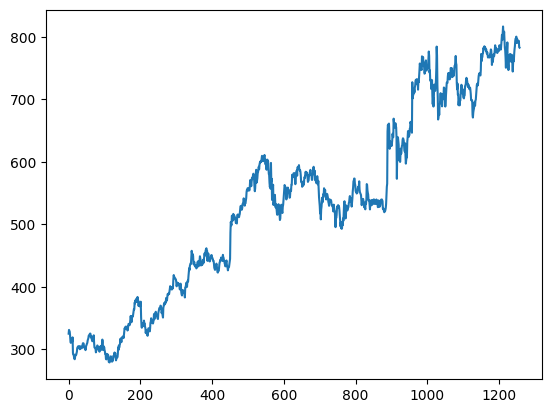

In [46]:
plt.plot(training_data)
plt.show()

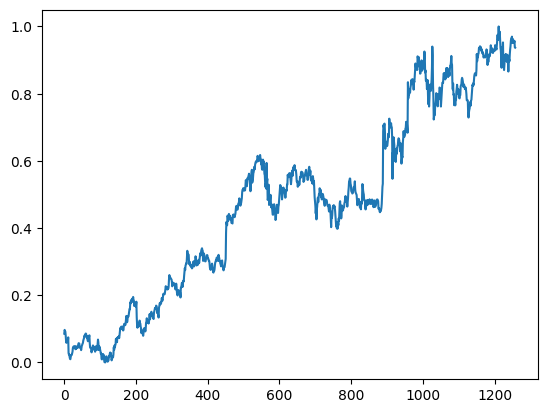

In [47]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range=(0,1))
train_data = sc.fit_transform(training_data)
train_data

plt.plot(train_data)
plt.show()

In [48]:

# create a data structure with 30 timesteps and 1 output
timestamps = 30
X_train = []
y_train = []

for i in range(timestamps,1258):
  X_train.append(train_data[i - timestamps: i, 0])
  y_train.append(train_data[i, 0])

X_train = np.array(X_train)
y_train = np.array(y_train)

# X_train.shape, y_train.shape

X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_train.shape

(1228, 30, 1)

In [49]:
# viewing the train and test sets
X_train.shape
# y_train

(1228, 30, 1)

In [50]:
from keras.models import Sequential
from keras.layers import  Dense, SimpleRNN, Dropout

In [51]:
regression_model = Sequential()

# first regression layer:
regression_model.add(SimpleRNN(units=30, activation='tanh',return_sequences=True, input_shape=(X_train.shape[1], 1)))
regression_model.add(Dropout(0.2))

# second RNN layer:
regression_model.add(SimpleRNN(units=30, activation='tanh',return_sequences=True))
regression_model.add(Dropout(0.2))

# third RNN layer:
regression_model.add(SimpleRNN(units=30, activation='tanh'))
regression_model.add(Dropout(0.2))

# Dense Layer:
regression_model.add(Dense(units=1))

regression_model.compile(optimizer='adam', loss='mean_squared_error')
regression_model.fit(X_train, y_train, epochs=100, batch_size=32)

Epoch 1/100


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


39/39 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.4695
Epoch 2/100
39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.1975
Epoch 3/100
39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.1120
Epoch 4/100
39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.0820
Epoch 5/100
39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0600
Epoch 6/100
39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0490
Epoch 7/100
39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0445
Epoch 8/100
39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0391
Epoch 9/100
39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0333
Epoch 10/100
39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0309
Epoch 11/100
39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0274
Epoch 12/100
39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0221
Epoch 13/100
39/39 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0230
Epoch 14/100
39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0211
Epoch 15/100
39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0184
E

In [52]:
regression_model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ simple_rnn_6 (SimpleRNN)        │ (None, 30, 30)         │           960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 30, 30)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_7 (SimpleRNN)        │ (None, 30, 30)         │         1,830 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 30, 30)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_8 (SimpleRNN)        │ (None, 30)             │         1,830 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 30)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            31 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 13,955 (54.52 KB)

 Trainable params: 4,651 (18.17 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 9,304 (36.35 KB)

In [53]:
testing_data = pd.read_csv('/content/drive/MyDrive/GenAI - 2025/DataSets/Google_Stock_Price_Test.csv')
testing_data.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2017,778.81,789.63,775.80,786.14,"1,657,300"
1,1/4/2017,788.36,791.34,783.16,786.90,"1,073,000"
2,1/5/2017,786.08,794.48,785.02,794.02,"1,335,200"
3,1/6/2017,795.26,807.90,792.20,806.15,"1,640,200"
4,1/9/2017,806.40,809.97,802.83,806.65,"1,272,400"


In [54]:
testing_data = testing_data.loc[:, ['Open']].values
testing_data.shape

(20, 1)

In [55]:
# from sklearn.preprocessing import MinMaxScaler
# sc = MinMaxScaler(feature_range=(0,1))
# testing_data = sc.fit_transform(testing_data)
# testing_data

# plt.plot(testing_data)
# plt.show()

In [56]:
# Getting the real stock price of 2017:
train_dataset =pd.read_csv('/content/drive/MyDrive/GenAI - 2025/DataSets/Google_Stock_Price_Train.csv')
testing_data = pd.read_csv('/content/drive/MyDrive/GenAI - 2025/DataSets/Google_Stock_Price_Test.csv')

In [57]:
real_stock_price = testing_data.loc[:, ['Open']].values
real_stock_price

array([[778.81],
       [788.36],
       [786.08],
       [795.26],
       [806.4 ],
       [807.86],
       [805.  ],
       [807.14],
       [807.48],
       [807.08],
       [805.81],
       [805.12],
       [806.91],
       [807.25],
       [822.3 ],
       [829.62],
       [837.81],
       [834.71],
       [814.66],
       [796.86]])

In [58]:
# Getting the predicted stock price of 2017:
dataset_total = pd.concat((train_dataset['Open'], testing_data['Open']), axis=0)
inputs = dataset_total[len(dataset_total) - len(testing_data) - 30:].values.reshape(-1,1)
inputs = sc.transform(inputs)  #min max scaler
inputs.shape

X_test = []
for i in range(30,50):
  X_test.append(inputs[i-30:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

predicted_stock_price = regression_model.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price.reshape(-1,1))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 344ms/step


Text(0, 0.5, 'Google Stock Price')

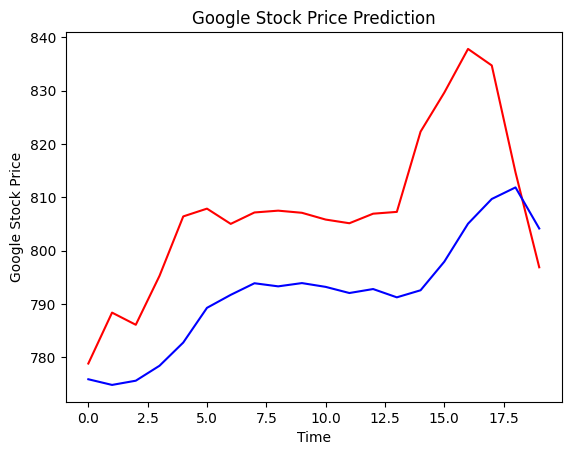

In [59]:
plt.plot(real_stock_price, color='red', label='Real Google Stock Price')
plt.plot(predicted_stock_price, color='blue', label='Predicted Google Stock Price')
plt.title("Google Stock Price Prediction")
plt.xlabel("Time")
plt.ylabel("Google Stock Price")